This code performs the following steps:

    Load Data: Load the California Housing dataset.
    Explore Data: Display the first few rows of the dataset to understand its structure.
    Split Data: Split the data into features (X) and the target variable (y).
    Train-Test Split: Split the data into training and testing sets.
    Create Model: Create a Linear Regression model.
    Fit Model: Fit the model to the training data.
    Make Predictions: Use the trained model to make predictions on the test set.
    Evaluate Model: Calculate the Mean Squared Error on the test data.
    Visualize Results: Create a scatter plot to visualize the predicted vs. actual values.

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


In [ ]:

# Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']], columns=california_housing['feature_names'] + ['target'])

# Explore the dataset
print(data.head())


In [13]:
# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# Create a Linear Regression model
regression = LinearRegression()

# Fit the model to the training data
regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = regression.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 0.5558915986952437


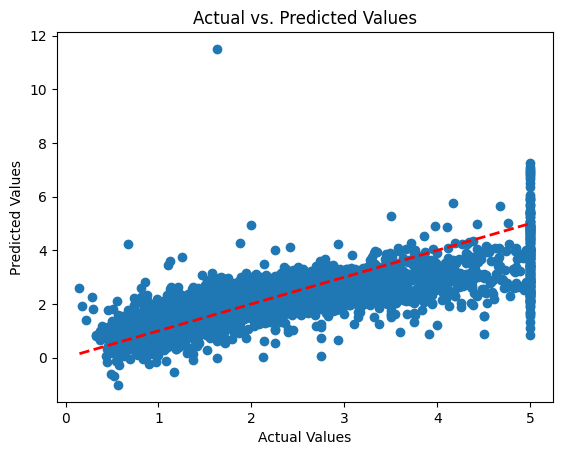

In [15]:
# Visualize the predicted vs. actual values on the test set
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


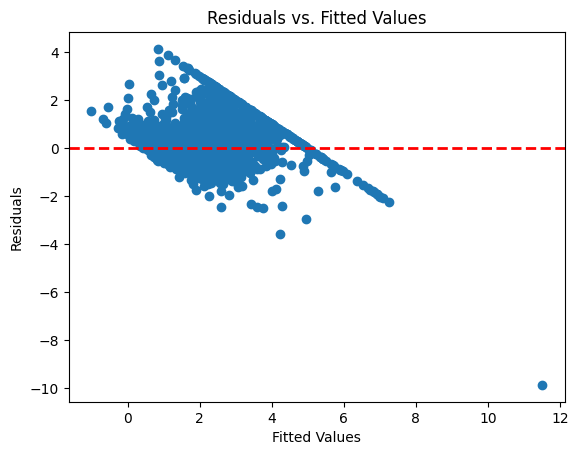

In [16]:
# Residuals Analysis
residuals = y_test - y_pred_test

# Residuals vs. Fitted Values Plot
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

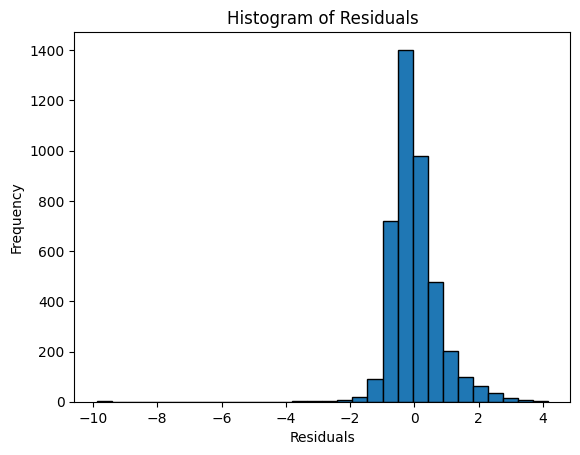

In [17]:
# Histogram of Residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

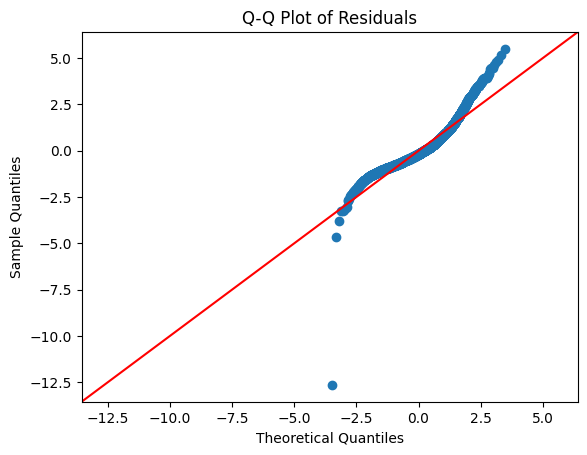

In [18]:
# Q-Q Plot of Residuals
import statsmodels.api as sm
residuals_standardized = sm.OLS(y_test, sm.add_constant(y_pred_test)).fit().resid_pearson
sm.qqplot(residuals_standardized, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()